In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os, sys, h5py, time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mat
import seaborn as sb
import tensorflow as tf
import scipy

import sys
sys.path.append('../../../..')
import mutagenesisfunctions as mf
import bpdev as bd
import helper
from deepomics import neuralnetwork as nn
from deepomics import utils, fit, visualize, saliency

import contacts

from Bio import AlignIO
import time as time
import pandas as pd
np.random.seed(42)

In [11]:
arrayspath = 'RF00005_mlp_512_sum1.npy'
scoremat = np.load(arrayspath)
seqlen,_, dims,_ = scoremat.shape

C = bd.get_wc(arrayspath, seqlen, dims, bpugSQ=0, denoise='APC')
#get coordinates
C[np.tril_indices(seqlen)] = np.min(C)
bp_stretch = np.ravel(C)
minval = np.sort(bp_stretch)[::-1][-1] #just gets the minimum value - can be changed to a different idx
bs = np.where(C > minval)
idx = np.argsort(C[bs])
x = bs[0][idx][::-1]#sorts the x and y coords in order from lowest to highest so highest scores will be plotted last
y = bs[1][idx][::-1]

scoremat.shape

(72, 72, 4, 4)

# BP' - BP'

In [25]:
#infernal SS
SS_dict = {}
for fam in ['RF00005']:
    SSfile = '../Rfam11stos/%s_rfam11_SS.txt'%(fam)
    with open(SSfile, 'r') as fd:
        for line in fd:
            SS_dict[fam] = line
            
nest_coords = bd.bp_coords(SS_dict[fam])
nest_coords = nest_coords[:len(nest_coords)//2]

/Users/steffanpaul/anaconda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


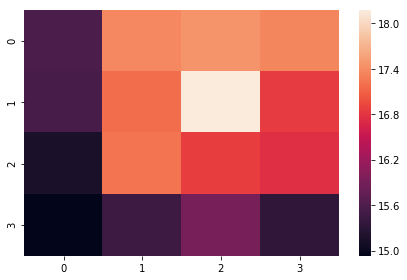

In [21]:
i=8
plt.figure()
sb.heatmap(scoremat[x[i], y[i]])
plt.show()

/Users/steffanpaul/anaconda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


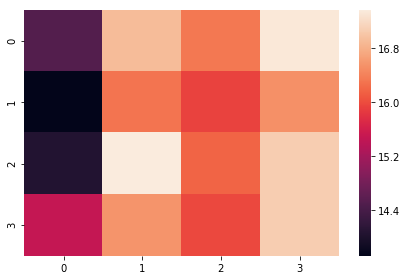

In [28]:
i=1
plt.figure()
sb.heatmap(scoremat[nest_coords[i][0], nest_coords[i][1]])
plt.show()

/Users/steffanpaul/anaconda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


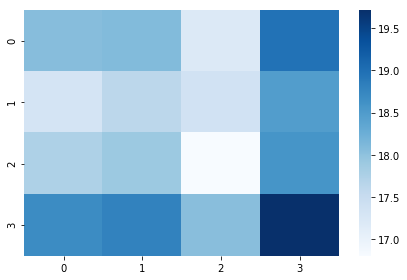

In [70]:
m  = np.mean(scoremat[nest_coords[:, 0], nest_coords[:,1]], axis=0)

plt.figure()
sb.heatmap(m, vmin=None, cmap='Blues')
plt.show()

/Users/steffanpaul/anaconda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


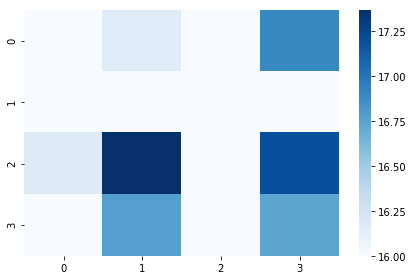

In [83]:
i = 4
plt.figure()
sb.heatmap(scoremat[nest_coords[i, 0], nest_coords[i,1]], vmin=16., cmap='Blues')
plt.show()

# U - U

In [65]:
ranges = [(14,17), (31,34), (52,57)]
rcoords = [14,31,52]
step = 4

UU_coords = []
for r in rcoords:
    for l in rcoords:
        for i in range(r, r+5):
            for j in range(l, l+5):
                UU_coords.append([i,j])

#UU_coords = []
#for r in ranges:
#    for i in range(r[0],r[1]+1):
#        for j in range(r[0],r[1]+1):
#            UU_coords.append([i,j])
UU_coords = np.asarray(UU_coords)

/Users/steffanpaul/anaconda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


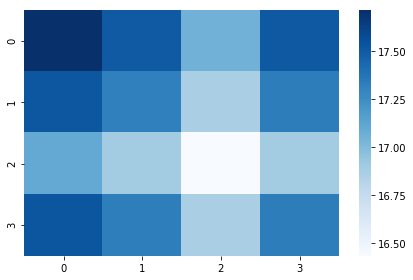

In [86]:
u  = np.mean(scoremat[UU_coords[:, 0], UU_coords[:,1]], axis=0)

plt.figure()
sb.heatmap(u, cmap='Blues')
plt.show()

/Users/steffanpaul/anaconda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


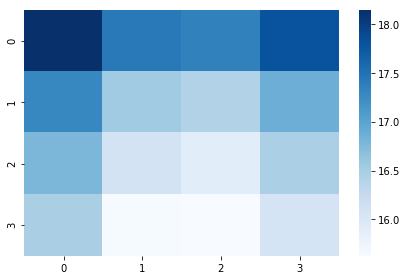

In [91]:
i=23
u  = np.mean(scoremat[UU_coords[i:i+1, 0], UU_coords[i:i+1,1]], axis=0)

plt.figure()
sb.heatmap(u, cmap='Blues')
plt.show()

# B' - B''

In [68]:
rcoords = [14,31,52]
step = 4

BBn_coords = []
r = 47
l = 0
for i in range(r, r+4):
    for j in range(l, l+6):
        BBn_coords.append([i,j])

#UU_coords = []
#for r in ranges:
#    for i in range(r[0],r[1]+1):
#        for j in range(r[0],r[1]+1):
#            UU_coords.append([i,j])
BBn_coords = np.asarray(BBn_coords)

/Users/steffanpaul/anaconda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


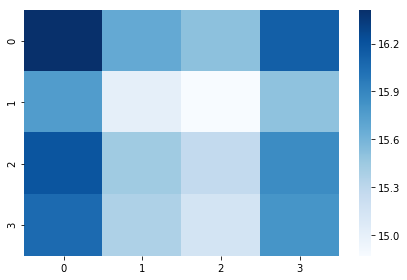

In [69]:
bbn  = np.mean(scoremat[BBn_coords[:, 0], BBn_coords[:,1]], axis=0)

plt.figure()
sb.heatmap(bbn, cmap='Blues')
plt.show()

# B - U

In [62]:
Bst = 26
step = 4

BU_coords = [[Bst,i] for i in range(seqlen)]


#UU_coords = []
#for r in ranges:
#    for i in range(r[0],r[1]+1):
#        for j in range(r[0],r[1]+1):
#            UU_coords.append([i,j])
BU_coords = np.asarray(BU_coords)

/Users/steffanpaul/anaconda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


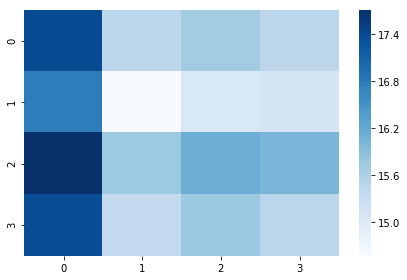

In [84]:
bu  = np.mean(scoremat[BU_coords[:1, 0], BU_coords[:1,1]], axis=0)

plt.figure()
sb.heatmap(bu, cmap='Blues')
plt.show()

In [39]:
#get scores
arrayspath = 'RF00005_mlp_512_sum1.npy'
hol_mut2 = np.load(arrayspath)
seqlen,_, dims,_ = hol_mut2.shape
C00 = bd.get_wc(arrayspath, seqlen, dims, bpugSQ=0, denoise=None)
C10 = bd.get_wc(arrayspath, seqlen, dims, bpugSQ=0, denoise='APC')


arrayspath = 'RF00005_mlp_512_red.npy'
hol_mut2 = np.load(arrayspath)
seqlen,_, dims,_ = hol_mut2.shape
C01 = bd.get_wc(arrayspath, seqlen, dims, bpugSQ=0, denoise=None)
C11 = bd.get_wc(arrayspath, seqlen, dims, bpugSQ=0, denoise='APC')

/Users/steffanpaul/anaconda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


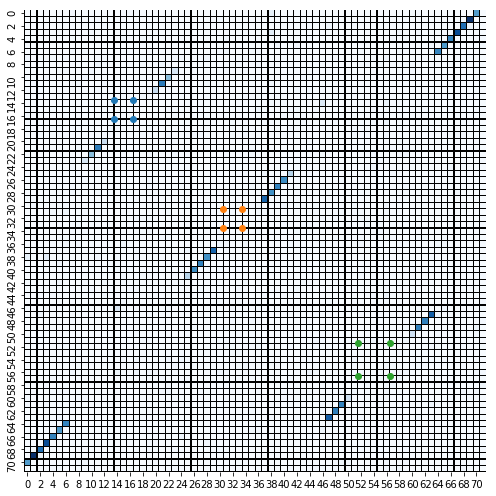

In [79]:
plt.figure(figsize=(7,7))
sb.heatmap(C11, cbar=False, cmap='Blues', vmin=0., linewidths=0.1, linecolor='k')
#plt.savefig('RF00005_postAPC.pdf')
plt.scatter([14,14,17,17], [17,14,17,14])
plt.scatter([31,31,34,34], [34,31,34,31])
plt.scatter([52,52,57,57], [57,52,57,52])



plt.show()

/Users/steffanpaul/anaconda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


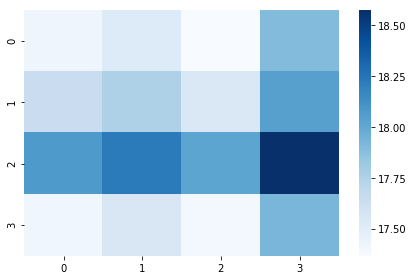

In [99]:
bbn  = np.mean(scoremat[BBn_coords[:, 0], BBn_coords[:,1]], axis=0)

plt.figure()
sb.heatmap(scoremat[13,16], cmap='Blues')
plt.show()